# Soil Cracks

Some soil exhibit shrinking (when drying) and swelling (when wetting) with soil moisture changes. Soil cracks emerge as a consequence of the conformational changes in the structure of clay minerals with changes in soil moisture. Soil cracks can lead to preferential water flow and rapid solute and contaminants transport to deeper soil layers. Soil expansion and contraction can also affect building foundations. Expansive soils are usually characterized by moderate to high clay content, particularly in soils with high content of montmorillonite, a typical clay in vertisols.

>Montmorillonite can increase fifteen times its dry volume and can exhert an expansive pressure of 150,000 kg per square meter!

In addition to that, the resulting patterns formed by the soil cracks are attractive to scientisits and enthusiasts interested in fractal patterns.


In [12]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, morphology, filters


In [9]:
RGB = io.imread("../datasets/soil_cracks.jpg")
RGB.shape


(3264, 2448, 3)

In [10]:
# Gray scale version
BW = color.rgb2gray(RGB)


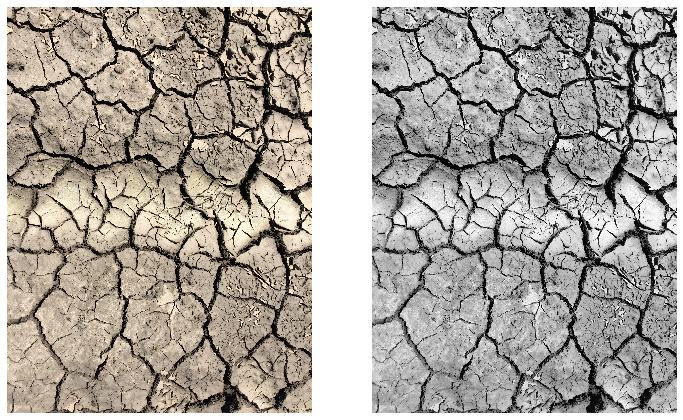

In [11]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.imshow(RGB)
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(BW, cmap="gray")
plt.axis('off')

plt.show()


In [14]:
# Sato tubeness filter
BW_sato = filters.sato(BW, sigmas=range(1, 10, 2), black_ridges=True)

# Frangi vesselness filter
BW_frangi = filters.frangi(BW, sigmas=range(1, 10, 2), black_ridges=True)


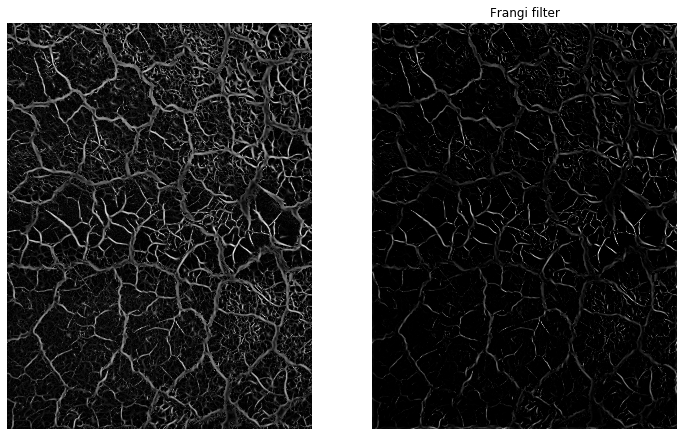

In [19]:
plt.figure(figsize=(12,8))
plt.title("Sato filter")
plt.subplot(1,2,1)
plt.imshow(BW_sato, cmap="gray")
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Frangi filter")
plt.imshow(BW_frangi, cmap="gray")
plt.axis('off')

plt.show()


In [16]:
# Let's examine a portion of one of the classified images
BW_sato[0:5,0:5]


array([[0.11081854, 0.10405438, 0.09247755, 0.08217813, 0.07204519],
       [0.10507106, 0.097352  , 0.08444911, 0.07310497, 0.06206067],
       [0.09445599, 0.0853131 , 0.07042889, 0.05745314, 0.0449282 ],
       [0.08393366, 0.07349174, 0.0567658 , 0.04231681, 0.02848959],
       [0.0734532 , 0.06184009, 0.04341796, 0.02765935, 0.01271151]])

In [17]:
# Absolute maximum value of the classified image
print(np.max(BW_sato.flatten()))

# Absolute minimum value of the classified image
print(np.min(BW_sato.flatten()))


0.4041610902514181
0.0


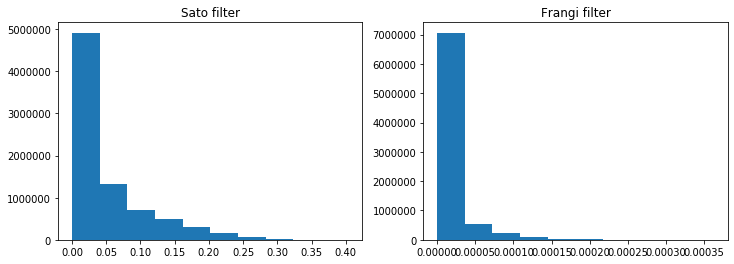

In [18]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.title('Sato filter')
plt.hist(BW_sato.flatten())

plt.subplot(1,2,2)
plt.title('Frangi filter')
plt.hist(BW_frangi.flatten())

plt.show()


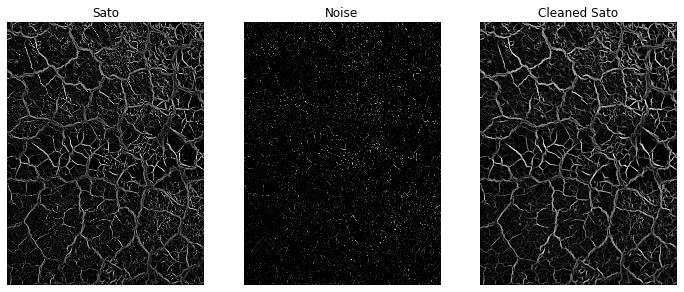

In [23]:
selem = morphology.disk(4)
noise = morphology.white_tophat(BW_sato, selem)

plt.figure(figsize=(12,6))

plt.subplot(1,3,1)
plt.title('Sato')
plt.imshow(BW_sato, cmap="gray")
plt.axis('off')

plt.subplot(1,3,2)
plt.title('Noise')
plt.imshow(noise, cmap="gray")
plt.axis('off')

plt.subplot(1,3,3)
plt.title('Cleaned Sato')
plt.imshow(BW_sato - noise, cmap="gray")
plt.axis('off')
plt.show()


Cracks occupy: 19.4 % of the area.


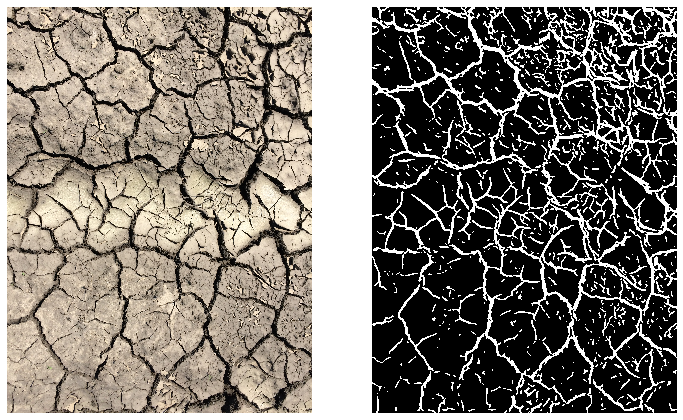

In [35]:
BW_sato_clean = np.zeros(BW_sato.shape)
idx = (BW_sato - noise) > 0.075
BW_sato_clean[idx] = 1

percentage_cracks = np.sum(BW_sato_clean.flatten()) / BW_sato_clean.size * 100
print('Cracks occupy:',round(percentage_cracks,1), '% of the area.')

plt.figure(figsize=(12,8))

plt.subplot(1,2,1)
plt.imshow(RGB)
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(BW_sato_clean, cmap="gray")
plt.axis('off')
plt.show()


In [39]:
# Compute fractal dimension using Box count method
# Source: https://stackoverflow.com/questions/44793221/python-fractal-box-count-fractal-dimension

# From https://github.com/rougier/numpy-100 (#87)
def boxcount(Z, k):
    S = np.add.reduceat(
        np.add.reduceat(Z, np.arange(0, Z.shape[0], k), axis=0),
                           np.arange(0, Z.shape[1], k), axis=1)

    # We count non-empty (0) and non-full boxes (k*k)
    return len(np.where((S > 0) & (S < k*k))[0])
    
def fractal_dimension(Z):

    # Minimal dimension of image
    p = min(Z.shape)

    # Greatest power of 2 less than or equal to p
    n = 2**np.floor(np.log(p)/np.log(2))

    # Extract the exponent
    n = int(np.log(n)/np.log(2))

    # Build successive box sizes (from 2**n down to 2**1)
    sizes = 2**np.arange(n, 1, -1)

    # Actual box counting with decreasing size
    counts = []
    for size in sizes:
        counts.append(boxcount(Z, size))

    # Fit the successive log(sizes) with log (counts)
    coeffs = np.polyfit(np.log(sizes), np.log(counts), 1)
    
    # Return slope with inverse sign
    return -coeffs[0]

In [40]:
fractal_dimension(BW_sato_clean)

1.5859342852308054